# Gradient Descent
## Rosenbrock Function Optimization (credit Eric Yuan)

### 1) Objective

Optimization methods such as **Gradient Descent** play a crucial role when training ANNs and are important for many other machine learning tools. In this example, we want you to get an idea of how different flavours of two main optimization algorithms, **Gradient Descent** and **Simulated Annealing**, work. For that purpose, we want to find the minimum of the Rosenbrock function using gradient-free and gradient-based optimization methods and visualize the process.

### 2) Preparation

Before starting, import the necessary libraries for optimization and visualization.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Define the Rosenbrock function 

$$f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$$

Visualization of the function with `plt.contourf` or `go.Surface` to understand its landscape within $-2 \leq x_1 \leq 2$ and $-1 \leq x_2 \leq 3$. 

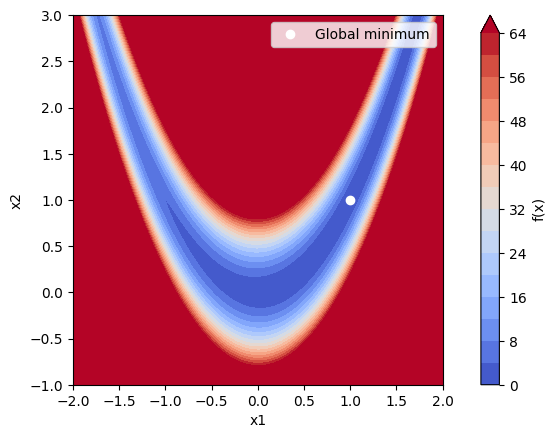

In [13]:
# Rosenbrock function
def f(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

# Visualization
X1, X2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
F = f(np.array([X1, X2]))
plt.contourf(X1, X2, F, levels=np.linspace(0, 64, 17), cmap='coolwarm', extend='max')
plt.plot(1, 1, 'wo', label='Global minimum')
plt.colorbar(label='f(x)')
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Deriving the gradient of the Rosenbrock function and visualization of the (negative) gradient field using `plt.quiver` or `go.Cone`.

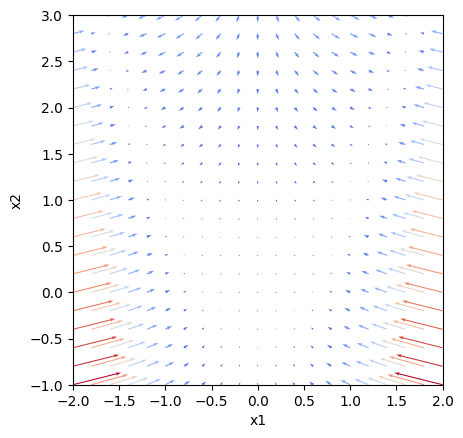

In [15]:
# Gradient of the Rosenbrock function
def g(x):
    x1, x2 = x
    dfdx1 = -400 * x1 * (x2 - x1**2) + 2 * (x1 - 1)
    dfdx2 = 200 * (x2 - x1**2)
    return np.array([dfdx1, dfdx2])

# Visualization
X1, X2 = np.meshgrid(np.linspace(-2, 2, 21), np.linspace(-1, 3, 21))
G = g(np.array([X1, X2]))
plt.quiver(X1, X2, -G[0], -G[1], np.linalg.norm(G, axis=0), cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.show()

### 3) Simulated Annealing

Suppose we only have access to the function value but not its gradient, simulated annealing is perhaps the most straightforward optimization method to implement. Therefore, as a warm-up exercise, implement the simulated annealing algorithm to find the minimum of the Rosenbrock function.

The algorithm works as follows:
1. Start from an initial point (e.g., (-1, 2)).
2. Generate a new candidate point by adding a small random perturbation to the current point.
3. Decide whether to accept the new point based on the Metropolis criterion:
$$P_\text{move} = \begin{cases} 1 & \text{if } \Delta E < 0 \\ e^{-\Delta E / T} & \text{if } \Delta E \geq 0 \end{cases}$$
4. Start with a high temperature $T$ (e.g., 1.0)
5. Optional Gradually cool down (e.g., by multiplying $T$ by 0.9).
6. Repeat steps 2-5 for a sufficient number of iterations (e.g., 1000).

We plot the trajectory of points visited during the optimization on top of the contour plot of the Rosenbrock function and the function value versus iteration number to show convergence.

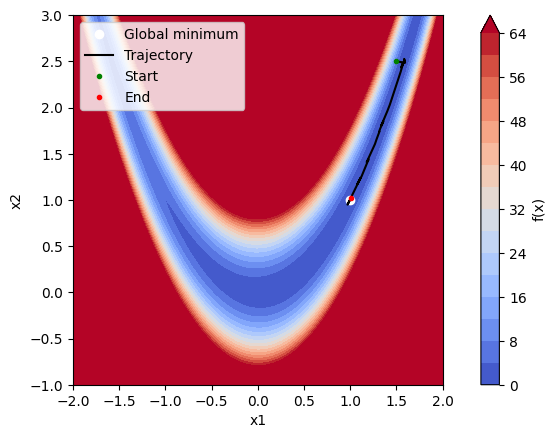

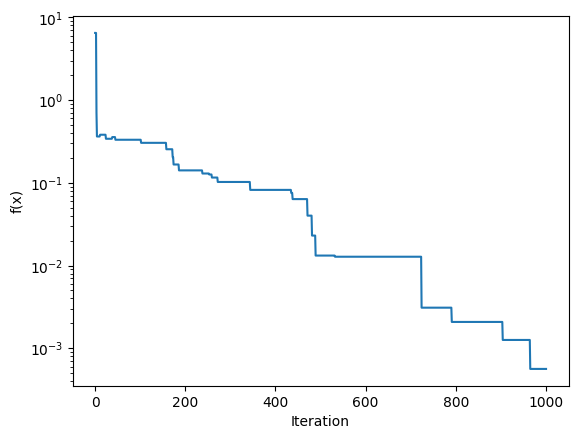

In [17]:
# Simulated annealing
x = np.array([1.5, 2.5])
trajectory = [x.copy()]
values = [f(x)]
scale = 0.1
temperature = 1
np.random.seed(0)
for n in range(1000):
    # Generate a new candidate point
    x_trial = x + np.random.normal(0, scale, size=2)
    # Metropolis criterion
    delta_E = f(x_trial) - f(x)
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
        x = x_trial
    # Record the trajectory and function value
    trajectory.append(x.copy())
    values.append(f(x))
    # Cool down
    temperature *= 0.9

# Visualization
trajectory = np.array(trajectory)
X1, X2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
F = f(np.array([X1, X2]))
plt.contourf(X1, X2, F, levels=np.linspace(0, 64, 17), cmap='coolwarm', extend='max')
plt.plot(1, 1, 'wo', label='Global minimum')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-k', label='Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], '.g', label='Start')
plt.plot(trajectory[-1, 0], trajectory[-1, 1], '.r', label='End')
plt.colorbar(label='f(x)')
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Optimization curve
values = np.array(values)
plt.plot(values)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.show()

With a proper cooling schedule, the optimization can get close to the global minimum. A higher temperature allows for more exploration, but it can also drive the system away from the minimum if not cooled properly. A lower temperature results in more rejection, leading to a more focused search but could be less efficient. The cooling schedule is crucial; too fast cooling can lead to slow convergence or getting stuck, while too slow cooling would keep the system too "hot" and wandering around.

<br>

### 4) Gradient Descent

In case we have access to the gradient of the function, gradient descent is a more efficient optimization method, especially in high-dimensional spaces. This is also the basis for many advanced optimization algorithms. Let's implement the basic gradient descent algorithm to find the minimum of the Rosenbrock function.

The algorithm works as follows:
1. Start from an initial point (e.g., (1.5, 2.5)).
2. Update the current point using the gradient $g$ with a fixed learning rate $\eta$ (e.g., 0.001):
$$x \leftarrow x - \eta \, g(x)$$
3. Repeat step 2 for a sufficient number of iterations (e.g., 1000).

Also here, we plot the trajectory of points visited during the optimization on top of the contour plot of the Rosenbrock function and the function value versus iteration number to show convergence.

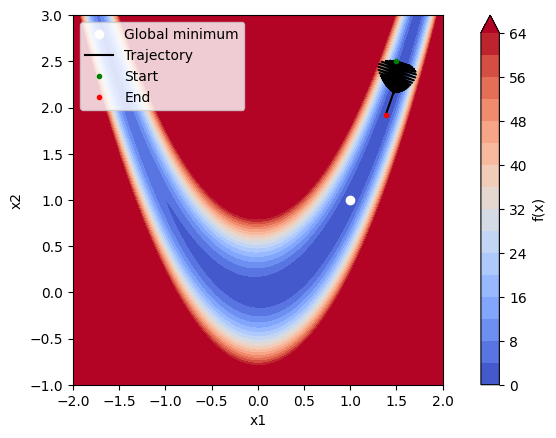

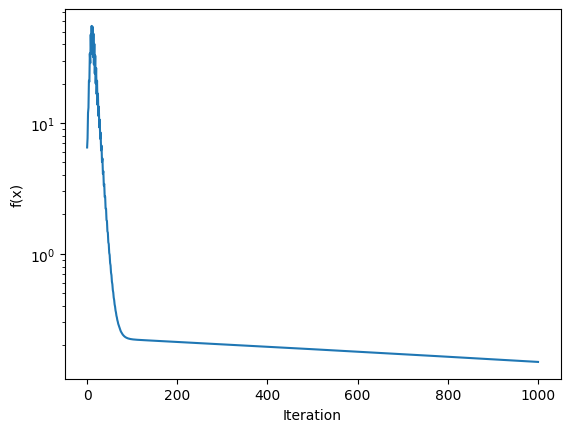

In [23]:
# Gradient descent
x = np.array([1.5, 2.5])
trajectory = [x.copy()]
values = [f(x)]
learning_rate = 0.001
for n in range(1000):
    # Gradient descent step
    x = x - learning_rate * g(x)
    # Record the trajectory and function value
    trajectory.append(x.copy())
    values.append(f(x))

# Visualization
trajectory = np.array(trajectory)
X1, X2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-1, 3, 400))
F = f(np.array([X1, X2]))
plt.contourf(X1, X2, F, levels=np.linspace(0, 64, 17), cmap='coolwarm', extend='max')
plt.plot(1, 1, 'wo', label='Global minimum')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-k', label='Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], '.g', label='Start')
plt.plot(trajectory[-1, 0], trajectory[-1, 1], '.r', label='End')
plt.colorbar(label='f(x)')
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Optimization curve
values = np.array(values)
plt.plot(values)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.show()

The gradient descent method struggles to get to the global minimum and is highly oscillatory. A large learning rate causes divergence, while a small learning rate leads to slow convergence.

<br>

### 5) Momentum Method

The basic gradient descent method converges slowly. In practice, more advanced variants of gradient descent are often used, such as momentum. The momentum method updates the current point as follows:
1. Initialize the velocity $v$ to 0.
2. Update the velocity with a momentum factor $\mu$ (e.g., 0.9) and the gradient $g$:
$$v \leftarrow \mu v + g(x)$$
3. Update the current point using the velocity $v$ and learning rate $\eta$:
$$x \leftarrow x - \eta v$$
4. Repeat steps 2-3 for a sufficient number of iterations (e.g., 1000).
Implement the momentum method and compare its performance with the basic gradient descent method. Plot the trajectories and function values for both methods on the same plots for comparison.

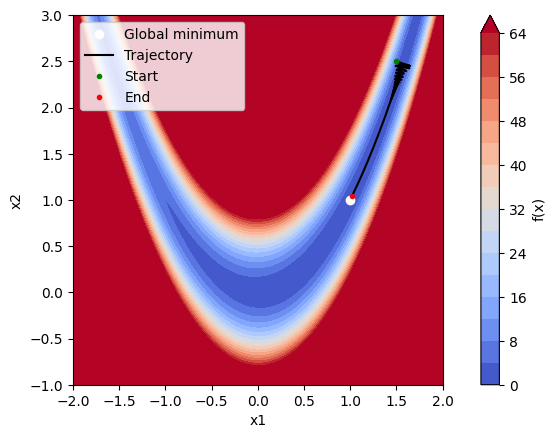

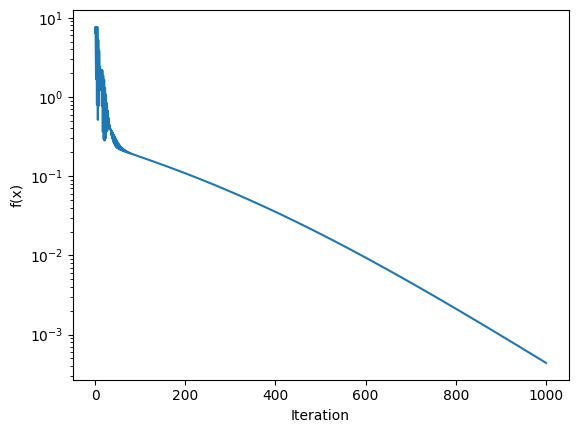

In [29]:
# Gradient descent with momentum
x = np.array([1.5, 2.5])
v = np.array([0.0, 0.0])
trajectory = [x.copy()]
values = [f(x)]
learning_rate = 0.001
momentum = 0.9
for i in range(1000):
    v = momentum * v + g(x)
    x = x - learning_rate * v
    trajectory.append(x.copy())
    values.append(f(x))

# Visualization
trajectory = np.array(trajectory)
plt.contourf(X1, X2, F, levels=np.linspace(0, 64, 17), cmap='coolwarm', extend='max')
plt.plot(1, 1, 'wo', label='Global minimum')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-k', label='Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'g.', label='Start')
plt.plot(trajectory[-1, 0], trajectory[-1, 1], 'r.', label='End')
plt.colorbar(label='f(x)')
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Optimization curve
values = np.array(values)
plt.plot(values)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.show()

The momentum effectively smooths out the oscillations and accelerates convergence towards the minimum. The build-up of velocity helps the optimization to maintain direction to reach the minimum faster. A higher momentum factor increases the influence of past gradients, which can help in navigating ravines but may also lead to overshooting if too high. The learning rate still plays a crucial role; too high a learning rate can cause divergence, while too low can slow down convergence.

<br>

### 6) More Advanced Methods

Research (e.g. [Bishop](https://www.bishopbook.com/), chapter 7.2.3 - 7.3.3) and implement advanced optimization methods (e.g., RMSprop, Adam, etc.) to optimize the Rosenbrock function. Some of these methods may require different hyperparameters or configurations (e.g., higher learning rates, different forms of momentum terms)

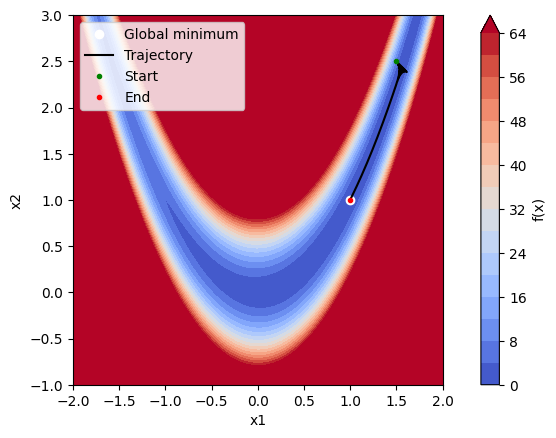

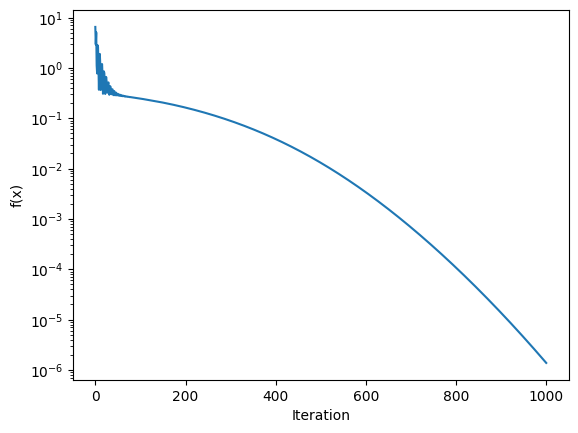

In [34]:
# Adaptive Moment Estimation (Adam)
x = np.array([1.5, 2.5])
m = np.array([0.0, 0.0])
v = np.array([0.0, 0.0])
trajectory = [x.copy()]
values = [f(x)]
learning_rate = 0.1
beta_1 = 0.9
beta_2 = 0.999
for i in range(1000):
    m = beta_1 * m + (1 - beta_1) * g(x)
    v = beta_2 * v + (1 - beta_2) * g(x)**2
    m_hat = m / (1 - beta_1**(i + 1))
    v_hat = v / (1 - beta_2**(i + 1))
    x = x - learning_rate * m_hat / np.sqrt(v_hat)
    trajectory.append(x.copy())
    values.append(f(x))

# Visualization
trajectory = np.array(trajectory)
plt.contourf(X1, X2, F, levels=np.linspace(0, 64, 17), cmap='coolwarm', extend='max')
plt.plot(1, 1, 'wo', label='Global minimum')
plt.plot(trajectory[:, 0], trajectory[:, 1], '-k', label='Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'g.', label='Start')
plt.plot(trajectory[-1, 0], trajectory[-1, 1], 'r.', label='End')
plt.colorbar(label='f(x)')
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Optimization curve
values = np.array(values)
plt.plot(values)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.show()

Adam generally performs better due to its adaptive learning rate mechanism, which adjusts the learning rate for each parameter based on the first and second moments of the gradients. This allows Adam to converge faster and more reliably, especially in scenarios with noisy or sparse gradients. The combination of momentum and adaptive learning rates helps Adam navigate complex landscapes more effectively than standard gradient descent or momentum methods alone.